In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#import the countries data from the csv file with an index column of countries
df_cubesat_updated = pd.read_csv("Feb13_Feb28_CubeSat_Data.csv")
#timestamp column to datetime 
df_cubesat_updated['timestamp'] = pd.to_datetime(df_cubesat_updated['timestamp'])
df_cubesat_updated = df_cubesat_updated.resample('H', on ='timestamp', axis=0).sum()
# df_cubesat = df_ground.resample('H', on ='timestamp', axis=0).mean()
df_cubesat_updated.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-02-13 17:00:00,2326,1614,2411
2024-02-13 18:00:00,3557,2497,3680
2024-02-13 19:00:00,3440,2452,3604
2024-02-13 20:00:00,3541,2489,3684
2024-02-13 21:00:00,3466,2486,3689


In [4]:
df_cubesat_updated["Chan_0_1_pct"] = ((df_cubesat_updated['Chan_0_1'] - df_cubesat_updated['Chan_0_1'].mean())/ 
                      df_cubesat_updated['Chan_0_1'].mean()*100)
df_cubesat_updated["Chan_0_2_pct"] = ((df_cubesat_updated['Chan_0_2'] - df_cubesat_updated['Chan_0_2'].mean())/ 
                      df_cubesat_updated['Chan_0_2'].mean()*100)
df_cubesat_updated["Chan_1_2_pct"] = ((df_cubesat_updated['Chan_1_2'] - df_cubesat_updated['Chan_1_2'].mean())/ 
                      df_cubesat_updated['Chan_1_2'].mean()*100)
df_cubesat_updated["Chan_0_1_m_avg"] = df_cubesat_updated.rolling('12H').Chan_0_1_pct.mean()
df_cubesat_updated["Chan_0_2_m_avg"] = df_cubesat_updated.rolling('12H').Chan_0_2_pct.mean()
df_cubesat_updated["Chan_1_2_m_avg"] = df_cubesat_updated.rolling('12H').Chan_1_2_pct.mean()

df_cubesat_updated.head()

#remove first and last line of data
df_cubesat_updated = df_cubesat_updated.iloc[1:]
df_cubesat_updated = df_cubesat_updated.iloc[:-1]

In [5]:
#import the countries data from the csv file with an index column of countries
df_ground_updated = pd.read_csv("Rm415SA-Pi3crm001-E5-Oct5_2024_02_13_to_02_28.csv")
#timestamp column to datetime 
df_ground_updated['timestamp'] = pd.to_datetime(df_ground_updated['timestamp'])
df_ground_updated = df_ground_updated.resample('H', on ='timestamp', axis=0).sum()
# df_cubesat = df_ground.resample('H', on ='timestamp', axis=0).mean()
df_ground_updated.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-02-13 17:00:00,6623,3224,6645
2024-02-13 18:00:00,10123,5018,10413
2024-02-13 19:00:00,10164,4949,10333
2024-02-13 20:00:00,9959,4899,10226
2024-02-13 21:00:00,10415,5109,10413


In [6]:
df_ground_updated["Chan_0_1_pct"] = ((df_ground_updated['Chan_0_1'] - df_ground_updated['Chan_0_1'].mean())/ 
                      df_ground_updated['Chan_0_1'].mean()*100)
df_ground_updated["Chan_0_2_pct"] = ((df_ground_updated['Chan_0_2'] - df_ground_updated['Chan_0_2'].mean())/ 
                      df_ground_updated['Chan_0_2'].mean()*100)
df_ground_updated["Chan_1_2_pct"] = ((df_ground_updated['Chan_1_2'] - df_ground_updated['Chan_1_2'].mean())/ 
                      df_ground_updated['Chan_1_2'].mean()*100)
df_ground_updated["Chan_0_1_m_avg"] = df_ground_updated.rolling('12H').Chan_0_1_pct.mean()
df_ground_updated["Chan_0_2_m_avg"] = df_ground_updated.rolling('12H').Chan_0_2_pct.mean()
df_ground_updated["Chan_1_2_m_avg"] = df_ground_updated.rolling('12H').Chan_1_2_pct.mean()

df_ground_updated.head()

#filter out first and last lines of data
df_ground_updated = df_ground_updated.iloc[1:]
df_ground_updated = df_ground_updated.iloc[:-1]

In [7]:
df_weather = pd.read_csv("AW_Feb7_Feb28.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').sum()
# df_weather = df_weather.resample('H').sum()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined3 = pd.concat([df_cubesat_updated, df_weather], axis=1, join='outer')
df_combined3.dropna(inplace=True)
df_combined3.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Outdoor_Temperature,...,Daily_Rain,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg)
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-13 18:00:00,3557.0,2497.0,3680.0,-2.507694,-0.830265,-2.372048,-19.377673,-18.364682,-19.204911,608.0,...,0.0,37.32,44.64,930.12,360.0,503,0,24.4,348.40,12
2024-02-13 19:00:00,3440.0,2452.0,3604.0,-5.714497,-2.617465,-4.388277,-14.823281,-13.115610,-14.266033,586.7,...,0.0,37.32,44.64,930.12,360.3,564,0,0.0,348.70,12
2024-02-13 20:00:00,3541.0,2489.0,3684.0,-2.946231,-1.147990,-2.265930,-11.854018,-10.123705,-11.266007,567.9,...,0.0,37.32,44.64,930.12,360.5,606,0,0.0,348.87,12
2024-02-13 21:00:00,3466.0,2486.0,3689.0,-5.001874,-1.267136,-2.133284,-10.483590,-8.352391,-9.439462,543.0,...,0.0,37.32,44.64,930.12,360.6,664,0,0.0,349.01,12
2024-02-13 22:00:00,3459.0,2399.0,3630.0,-5.193734,-4.722389,-3.698514,-9.601947,-7.747391,-8.482638,531.7,...,0.0,37.32,44.64,930.12,360.6,707,0,0.0,348.99,12


In [8]:
#scale temperature by the percent change
df_combined3['Temperature_F_pct'] = ((df_combined3['Outdoor_Temperature'] - df_combined3['Outdoor_Temperature'].mean())/ 
                      df_combined3['Outdoor_Temperature'].mean()*100)
#scale by 0.1
df_combined3['Temperature_F_pct'] = df_combined3['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined3['Relative_Pressure_(inHg)'].sum()
df_combined3['Relative_Pressure_pct'] = ((df_combined3['Relative_Pressure_(inHg)'] - df_combined3['Relative_Pressure_(inHg)'].mean())/ 
                      df_combined3['Relative_Pressure_(inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined3['Relative_Pressure_pct'] = df_combined3['Relative_Pressure_pct'] * 2

#filter any Relative_Pressure_pct values that are less than -10 and replace them with average
#df_combined3['Relative_Pressure_pct'] = df_combined3['Relative_Pressure_pct'].mask(df_combined3['Relative_Pressure_pct'] < -10, df_combined3['Relative_Pressure_pct'].mean())

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined3['Relative_Pressure_pct'] = df_combined3['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined3['Relative_Pressure_pct'].mean())

df_combined3.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Outdoor_Temperature,...,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg),Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-13 18:00:00,3557.0,2497.0,3680.0,-2.507694,-0.830265,-2.372048,-19.377673,-18.364682,-19.204911,608.0,...,44.64,930.12,360.0,503,0,24.4,348.40,12,-0.358971,0.294192
2024-02-13 19:00:00,3440.0,2452.0,3604.0,-5.714497,-2.617465,-4.388277,-14.823281,-13.115610,-14.266033,586.7,...,44.64,930.12,360.3,564,0,0.0,348.70,12,-0.696724,0.461104
2024-02-13 20:00:00,3541.0,2489.0,3684.0,-2.946231,-1.147990,-2.265930,-11.854018,-10.123705,-11.266007,567.9,...,44.64,930.12,360.5,606,0,0.0,348.87,12,-0.994835,0.572378
2024-02-13 21:00:00,3466.0,2486.0,3689.0,-5.001874,-1.267136,-2.133284,-10.483590,-8.352391,-9.439462,543.0,...,44.64,930.12,360.6,664,0,0.0,349.01,12,-1.389673,0.628015
2024-02-13 22:00:00,3459.0,2399.0,3630.0,-5.193734,-4.722389,-3.698514,-9.601947,-7.747391,-8.482638,531.7,...,44.64,930.12,360.6,707,0,0.0,348.99,12,-1.568857,0.628015


In [9]:
#drop the first 5 lines of data
df_combined3 = df_combined3.iloc[5:]
df_ground_updated = df_ground_updated.iloc[5:]
df_cubesat_updated = df_cubesat_updated.iloc[5:]

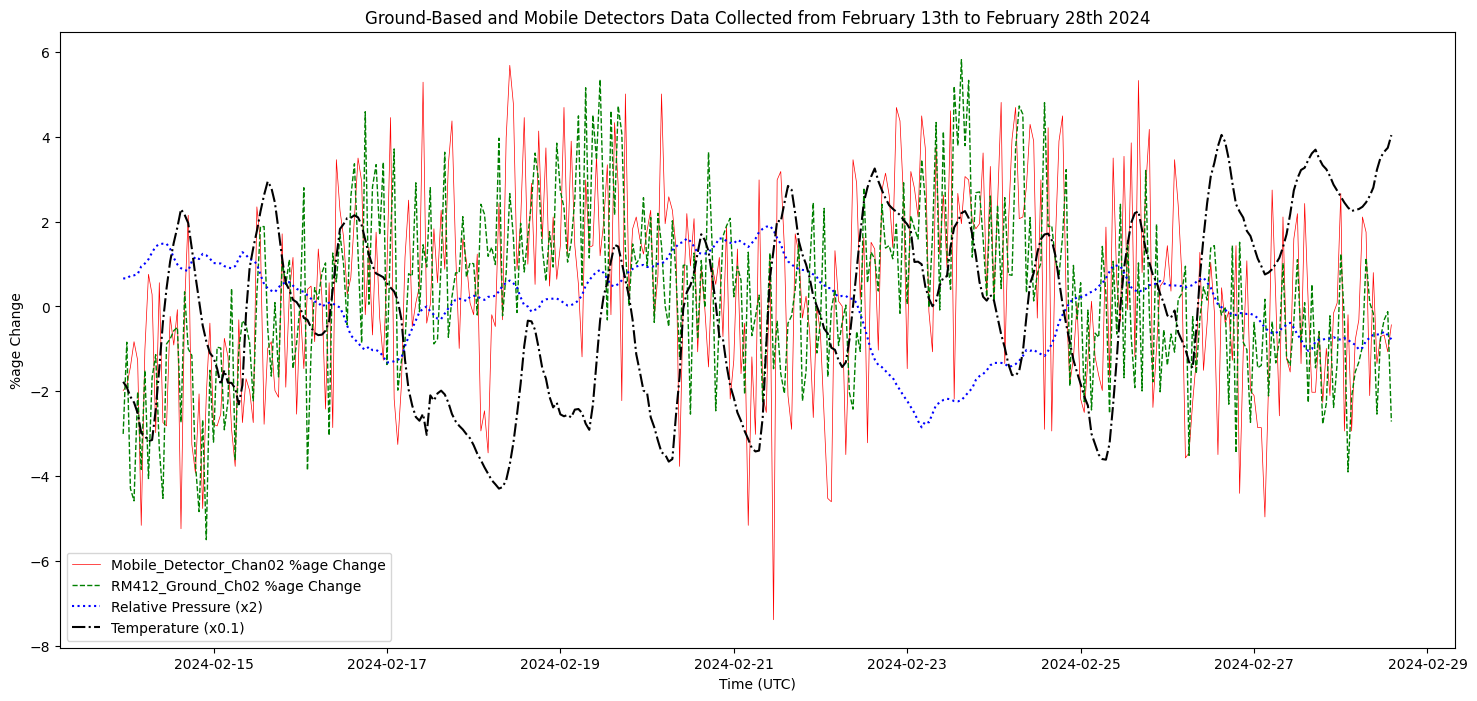

In [10]:
plt.rcParams["axes.grid"] = False
fig, (ax6) = plt.subplots(1,figsize=(18, 8))

ax6.plot(df_cubesat_updated["Chan_0_2_pct"], #marker='o', markersize=3, 
         linestyle='-', linewidth=0.5, color='red', label='Mobile_Detector_Chan02 %age Change')
#ax6.plot(df_cubesat_updated["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='blue', label='Muon002_Ch13_m_avg')
#ax6.plot(df_cubesat_updated["Chan_1_2_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
#ax6.plot(df_cubesat_updated["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='green', label='Muon002_Ch23_m_avg')
#ax6.plot(df_cubesat_updated["Chan_0_1_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
#ax6.plot(df_cubesat_updated["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='red', label='Muon002_Ch12_m_avg')

#add ground data
ax6.plot(df_ground_updated["Chan_0_2_pct"], #marker='.', markersize=1, 
         linestyle='dashed', linewidth=1, color='green', label='RM412_Ground_Ch02 %age Change')

#add pressure from the weather data
ax6.plot(df_combined3.index, df_combined3['Relative_Pressure_pct'], color='blue',linestyle='dotted', label='Relative Pressure (x2)')
#add temperature from the weather data
ax6.plot(df_combined3.index, df_combined3['Temperature_F_pct'], color='black',linestyle='dashdot', label='Temperature (x0.1)')

ax6.set_ylabel('%age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('Ground-Based and Mobile Detectors Data Collected from February 13th to February 28th 2024')
ax6.legend(loc='lower left')

Quantify Data, 80% consistent?

In [11]:
# Calculating correlation coefficient
correlation_matrix = np.corrcoef(df_cubesat_updated["Chan_0_2_pct"], df_ground_updated["Chan_0_2_pct"])
correlation_coefficient = correlation_matrix[0, 1]
print("Correlation Matrix:' \n", correlation_matrix)

print("Correlation Coefficient:", correlation_coefficient)

Correlation Matrix:' 
 [[1.         0.37572748]
 [0.37572748 1.        ]]
Correlation Coefficient: 0.37572748131372435


In [12]:
#df_percentages new df blank
df_percentages = pd.DataFrame()
#add column of percent change of Chan_0_2 from the ground data to cubesat data
df_percentages['ground_Chan_0_2_pct'] = df_ground_updated['Chan_0_2_pct']
df_percentages['cubesat_Chan_0_2_pct'] = df_cubesat_updated['Chan_0_2_pct']
df_percentages.head()

,ground_Chan_0_2_pct,cubesat_Chan_0_2_pct
timestamp,,
2024-02-13 23:00:00,-3.004282,-1.982016
2024-02-14 00:00:00,-0.843197,-1.862870
2024-02-14 01:00:00,-4.289251,-1.425999
2024-02-14 02:00:00,-4.581289,-0.830265
2024-02-14 03:00:00,-2.011351,-1.267136


In [13]:
df_percentages.corr(method="spearman")

,ground_Chan_0_2_pct,cubesat_Chan_0_2_pct
ground_Chan_0_2_pct,1.000000,0.399458
cubesat_Chan_0_2_pct,0.399458,1.000000


In [14]:
mean_sensor_value = df_cubesat_updated['Chan_0_2_pct'].mean()
df_cubesat_updated['AboveMean'] = (df_cubesat_updated['Chan_0_2_pct'] > mean_sensor_value).astype(int)

mean_sens_val = df_ground_updated['Chan_0_2_pct'].mean()
df_ground_updated['AboveMean'] = (df_ground_updated['Chan_0_2_pct'] > mean_sens_val).astype(int)

df_cubesat_updated.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,AboveMean
timestamp,,,,,,,,,,
2024-02-13 23:00:00,3562,2468,3681,-2.370651,-1.982016,-2.345518,-8.568905,-6.923766,-7.605906,0
2024-02-14 00:00:00,3528,2471,3630,-3.302543,-1.862870,-3.698514,-7.910609,-6.291154,-7.117482,0
2024-02-14 01:00:00,3532,2482,3700,-3.192908,-1.425999,-1.841461,-7.386420,-5.750581,-6.531258,0
2024-02-14 02:00:00,3566,2497,3694,-2.261017,-0.830265,-2.000637,-6.873880,-5.258549,-6.078196,0
2024-02-14 03:00:00,3537,2486,3705,-3.055865,-1.267136,-1.708814,-6.526788,-4.895694,-5.680979,0


In [15]:
#df_percentages new df blank
df_percentages_spear = pd.DataFrame()
#add column of percent change of Chan_0_2 from the ground data to cubesat data
df_percentages_spear['ground_Chan_0_2_pct'] = df_ground_updated['AboveMean']
df_percentages_spear['cubesat_Chan_0_2_pct'] = df_cubesat_updated['AboveMean']
df_percentages_spear.head()

df_percentages_spear.corr(method="spearman")

,ground_Chan_0_2_pct,cubesat_Chan_0_2_pct
ground_Chan_0_2_pct,1.000000,0.335104
cubesat_Chan_0_2_pct,0.335104,1.000000


In [16]:
# Calculate the mode of the sensor values
mode_sensor_value = df_cubesat_updated['Chan_0_2_pct'].mode()
# If mode is empty or there are multiple modes, use median instead
if mode_sensor_value.empty or len(mode_sensor_value) > 1:
    mode_sensor_value = df_cubesat_updated['Chan_0_2_pct'].median()
else:
    mode_sensor_value = mode_sensor_value.iloc[0]
# Create a new column 'AboveMode'
df_cubesat_updated['AboveMode'] = (df_cubesat_updated['Chan_0_2_pct'] > mode_sensor_value).astype(int)
# Display the DataFrame
print(df_cubesat_updated.head())

                     Chan_0_1  Chan_0_2  Chan_1_2  Chan_0_1_pct  Chan_0_2_pct  \
timestamp                                                                       
2024-02-13 23:00:00      3562      2468      3681     -2.370651     -1.982016   
2024-02-14 00:00:00      3528      2471      3630     -3.302543     -1.862870   
2024-02-14 01:00:00      3532      2482      3700     -3.192908     -1.425999   
2024-02-14 02:00:00      3566      2497      3694     -2.261017     -0.830265   
2024-02-14 03:00:00      3537      2486      3705     -3.055865     -1.267136   

                     Chan_1_2_pct  Chan_0_1_m_avg  Chan_0_2_m_avg  \
timestamp                                                           
2024-02-13 23:00:00     -2.345518       -8.568905       -6.923766   
2024-02-14 00:00:00     -3.698514       -7.910609       -6.291154   
2024-02-14 01:00:00     -1.841461       -7.386420       -5.750581   
2024-02-14 02:00:00     -2.000637       -6.873880       -5.258549   
2024-02-14 03:00:0

In [17]:
# Calculate the mode of the sensor values
mode_sensor_value = df_ground_updated['Chan_0_2_pct'].mode()
# If mode is empty or there are multiple modes, use median instead
if mode_sensor_value.empty or len(mode_sensor_value) > 1:
    mode_sensor_value = df_ground_updated['Chan_0_2_pct'].median()
else:
    mode_sensor_value = mode_sensor_value.iloc[0]
# Create a new column 'AboveMode'
df_ground_updated['AboveMode'] = (df_ground_updated['Chan_0_2_pct'] > mode_sensor_value).astype(int)
# Display the DataFrame
print(df_ground_updated.head())

                     Chan_0_1  Chan_0_2  Chan_1_2  Chan_0_1_pct  Chan_0_2_pct  \
timestamp                                                                       
2024-02-13 23:00:00     10291      4982     10496     -1.704992     -3.004282   
2024-02-14 00:00:00     10329      5093     10303     -1.342033     -0.843197   
2024-02-14 01:00:00     10211      4916     10271     -2.469116     -4.289251   
2024-02-14 02:00:00     10156      4901     10144     -2.994451     -4.581289   
2024-02-14 03:00:00     10353      5033     10312     -1.112796     -2.011351   

                     Chan_1_2_pct  Chan_0_1_m_avg  Chan_0_2_m_avg  \
timestamp                                                           
2024-02-13 23:00:00     -0.370089       -7.841181       -8.085751   
2024-02-14 00:00:00     -2.202080       -7.028787       -7.180432   
2024-02-14 01:00:00     -2.505829       -6.522157       -6.859190   
2024-02-14 02:00:00     -3.711336       -6.169387       -6.631400   
2024-02-14 03:00:0

In [18]:
#df_percentages new df blank
df_percentages_mode = pd.DataFrame()
#add column of percent change of Chan_0_2 from the ground data to cubesat data
df_percentages_mode['ground_Chan_0_2_pct'] = df_ground_updated['AboveMode']
df_percentages_mode['cubesat_Chan_0_2_pct'] = df_cubesat_updated['AboveMode']
df_percentages_mode.head()

df_percentages_mode.corr(method="spearman")

,ground_Chan_0_2_pct,cubesat_Chan_0_2_pct
ground_Chan_0_2_pct,1.000000,0.251946
cubesat_Chan_0_2_pct,0.251946,1.000000


In [19]:
#df_percentages new df blank
df_percentages = pd.DataFrame()
#add column of percent change of Chan_0_2 from the ground data to cubesat data
df_percentages['ground_Chan_0_2_pct'] = df_ground_updated['Chan_0_2_pct']
df_percentages['cubesat_Chan_0_2_pct'] = df_cubesat_updated['Chan_0_2_pct']
df_percentages.head()

,ground_Chan_0_2_pct,cubesat_Chan_0_2_pct
timestamp,,
2024-02-13 23:00:00,-3.004282,-1.982016
2024-02-14 00:00:00,-0.843197,-1.862870
2024-02-14 01:00:00,-4.289251,-1.425999
2024-02-14 02:00:00,-4.581289,-0.830265
2024-02-14 03:00:00,-2.011351,-1.267136


In [21]:
from astropy.timeseries.periodograms import LombScargle

In [22]:
df_percentages.index = df_percentages.index - df_percentages.index[0]
df_percentages.index = df_percentages.index.total_seconds()/3600

In [23]:
df_percentages

,ground_Chan_0_2_pct,cubesat_Chan_0_2_pct
timestamp,,
0.0,-3.004282,-1.982016
1.0,-0.843197,-1.862870
2.0,-4.289251,-1.425999
3.0,-4.581289,-0.830265
4.0,-2.011351,-1.267136
...,...,...
347.0,-2.537020,-1.346567
348.0,-0.745851,-0.711119
349.0,-0.317527,-0.671403


In [24]:
frequency, power1 = LombScargle(df_percentages.index, df_percentages['ground_Chan_0_2_pct']).autopower()
_, power2 = LombScargle(df_percentages.index, df_percentages['cubesat_Chan_0_2_pct']).autopower()

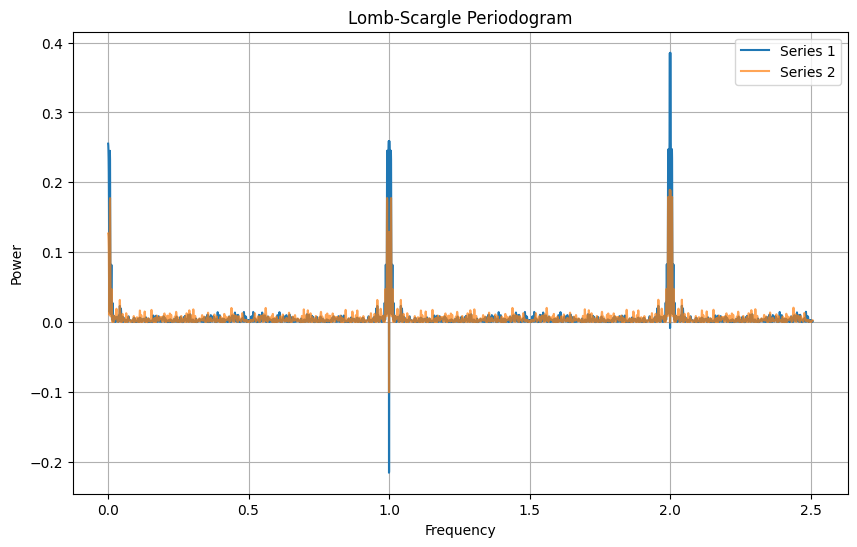

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(frequency, power1, label='Series 1')
plt.plot(frequency, power2, label='Series 2', alpha=0.7)
plt.title('Lomb-Scargle Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# correlation of periodogram spectrums

In [27]:
np.corrcoef(power1, power2)

array([[1.       , 0.9308246],
       [0.9308246, 1.       ]])